In [132]:
import numpy as np
import pandas as pd
import glob
import tqdm

In [89]:
df = pd.read_csv("pairs\pairs_3999.csv")
df = df[df.columns[1:]]
df.head()

,idx,q1,d1,d2,d3,d4,d5
0,3000,Is it a good idea to go for masters in data sc...,Is it advisable to pursue a data science maste...,"With 7 years of experience in Indian banking, ...","Would it be wise for me, as a btech graduate w...",As a BTech graduate with 7+ years of experienc...,Should I consider studying data science abroad...
1,3001,How can a mini cloud storage device be built o...,What is the process for creating a miniature c...,How can one go about constructing or assemblin...,Can you explain the steps involved in building...,Is it possible to create or manufacture a mini...,In what way can a miniature cloud storage devi...
2,3002,How can we use data analytics or data science ...,In what ways can data analytics or data scienc...,How can data analytics or data science be appl...,What are the potential applications of data an...,Can data analytics or Data Science be applied ...,What are some practical uses of data analytics...
3,3003,Why am I not getting sum option in Power BI? I...,I am not able to access the sum option in Powe...,How come I am not able to access the sum funct...,"Power BI is not providing the sum option, and ...",Why isn't the Sum option available in Power BI...,What could be the reason for not being able to...
4,3004,"As a research assistant, you were assigned to ...",Your role as a research assistant involved col...,What are the potential issues with the timelin...,"As a research assistant, you are responsible f...","In your capacity as a research assistant, you ...",You work as a research assistant. We are going...


In [90]:
df.values[0]

array([3000,
       'Is it a good idea to go for masters in data science abroad after a 7+ years experience in Indian banking? I’m a btech graduate and I’m trying for a career switch. I recently completed Google data analytics course and found this field interesting.',
       "Is it advisable to pursue a data science master's degree abroad as btech graduate who has worked in Indian banking for over 7 years, and am now considering pursuing specialized training through my Google data analytics course?",
       "With 7 years of experience in Indian banking, is it worth considering a master's degree program in data science abroad? I recently completed specialized training on Google analytics.",
       'Would it be wise for me, as a btech graduate with 7 years of experience in Indian banking, to pursue specialized training abroad after completing & initiating an Google data analytics course, on the cusp of switching my career?',
       "As a BTech graduate with 7+ years of experience in Ind

In [91]:
df_similar = df[["idx", "q1", "d1", "d2"]]
df_similar.head()

,idx,q1,d1,d2
0,3000,Is it a good idea to go for masters in data sc...,Is it advisable to pursue a data science maste...,"With 7 years of experience in Indian banking, ..."
1,3001,How can a mini cloud storage device be built o...,What is the process for creating a miniature c...,How can one go about constructing or assemblin...
2,3002,How can we use data analytics or data science ...,In what ways can data analytics or data scienc...,How can data analytics or data science be appl...
3,3003,Why am I not getting sum option in Power BI? I...,I am not able to access the sum option in Powe...,How come I am not able to access the sum funct...
4,3004,"As a research assistant, you were assigned to ...",Your role as a research assistant involved col...,What are the potential issues with the timelin...


In [92]:
df_similar1 = df_similar[["idx", "q1", "d1"]]
df_similar1.columns = ["idx", "q1", "q2"]
df_similar2 = df_similar[["idx", "q1", "d2"]]
df_similar2.columns = ["idx", "q1", "q2"]
df_similar = pd.concat([df_similar1, df_similar2], ignore_index=True)
df_similar["labels"] = 1

In [93]:
df_similar.sort_values(by=["q1"]).head()

,idx,q1,q2,labels
1524,3524,66 marks in GAT test are good enough for MS in...,Would a GAT score of 66 be enough to qualify f...,1
524,3524,66 marks in GAT test are good enough for MS in...,Is a GAT score of 66 sufficient for admission ...,1
958,3958,A BA graduate with no work-ex should do MBA in...,For a BA graduate who has no experience in wor...,1
1958,3958,A BA graduate with no work-ex should do MBA in...,If you have graduated with a BA and no prior w...,1
1067,3067,A Tik-Tok video claims if a forecast states a ...,"According to the Tik-Tok video, what is the pe...",1


In [104]:
df_notsimilar = df[["idx", "q1", "d3", "d4", "d5"]]
df_notsimilar.head()

,idx,q1,d3,d4,d5
0,3000,Is it a good idea to go for masters in data sc...,"Would it be wise for me, as a btech graduate w...",As a BTech graduate with 7+ years of experienc...,Should I consider studying data science abroad...
1,3001,How can a mini cloud storage device be built o...,Can you explain the steps involved in building...,Is it possible to create or manufacture a mini...,In what way can a miniature cloud storage devi...
2,3002,How can we use data analytics or data science ...,What are the potential applications of data an...,Can data analytics or Data Science be applied ...,What are some practical uses of data analytics...
3,3003,Why am I not getting sum option in Power BI? I...,"Power BI is not providing the sum option, and ...",Why isn't the Sum option available in Power BI...,What could be the reason for not being able to...
4,3004,"As a research assistant, you were assigned to ...","As a research assistant, you are responsible f...","In your capacity as a research assistant, you ...",You work as a research assistant. We are going...


In [105]:
df_notsimilar1 = df_notsimilar[["idx", "q1", "d3"]]
df_notsimilar1.columns = ["idx", "q1", "q2"]
df_notsimilar2 = df_notsimilar[["idx", "q1", "d4"]]
df_notsimilar2.columns = ["idx", "q1", "q2"]
df_notsimilar3 = df_notsimilar[["idx", "q1", "d5"]]
df_notsimilar3.columns = ["idx", "q1", "q2"]

In [106]:
df_notsimilar1.head()

,idx,q1,q2
0,3000,Is it a good idea to go for masters in data sc...,"Would it be wise for me, as a btech graduate w..."
1,3001,How can a mini cloud storage device be built o...,Can you explain the steps involved in building...
2,3002,How can we use data analytics or data science ...,What are the potential applications of data an...
3,3003,Why am I not getting sum option in Power BI? I...,"Power BI is not providing the sum option, and ..."
4,3004,"As a research assistant, you were assigned to ...","As a research assistant, you are responsible f..."


In [107]:
df_notsimilar2.head()

,idx,q1,q2
0,3000,Is it a good idea to go for masters in data sc...,As a BTech graduate with 7+ years of experienc...
1,3001,How can a mini cloud storage device be built o...,Is it possible to create or manufacture a mini...
2,3002,How can we use data analytics or data science ...,Can data analytics or Data Science be applied ...
3,3003,Why am I not getting sum option in Power BI? I...,Why isn't the Sum option available in Power BI...
4,3004,"As a research assistant, you were assigned to ...","In your capacity as a research assistant, you ..."


In [108]:
df_notsimilar3.head()

,idx,q1,q2
0,3000,Is it a good idea to go for masters in data sc...,Should I consider studying data science abroad...
1,3001,How can a mini cloud storage device be built o...,In what way can a miniature cloud storage devi...
2,3002,How can we use data analytics or data science ...,What are some practical uses of data analytics...
3,3003,Why am I not getting sum option in Power BI? I...,What could be the reason for not being able to...
4,3004,"As a research assistant, you were assigned to ...",You work as a research assistant. We are going...


In [109]:
np.random.shuffle(df_notsimilar1["q2"].values)
np.random.shuffle(df_notsimilar2["q2"].values)
np.random.shuffle(df_notsimilar3["q2"].values)

In [110]:
df_notsimilar1.head()

,idx,q1,q2
0,3000,Is it a good idea to go for masters in data sc...,"In the world, what is the percentage of indivi..."
1,3001,How can a mini cloud storage device be built o...,Can you suggest some male names that sound low...
2,3002,How can we use data analytics or data science ...,How does Concordia University of Edmonton's ma...
3,3003,Why am I not getting sum option in Power BI? I...,I'm a computer science engineering student in ...
4,3004,"As a research assistant, you were assigned to ...",Will ISRO accept applications from final year ...


In [111]:
df_notsimilar2.head()

,idx,q1,q2
0,3000,Is it a good idea to go for masters in data sc...,With 3 years of experience in an MNC and a sal...
1,3001,How can a mini cloud storage device be built o...,Is there a way to export and import your Googl...
2,3002,How can we use data analytics or data science ...,Which degree in engineering is the most benefi...
3,3003,Why am I not getting sum option in Power BI? I...,How would you define CDB AIA at Cognizant and ...
4,3004,"As a research assistant, you were assigned to ...",Could you suggest some brief one-liners on the...


In [112]:
df_notsimilar3.head()

,idx,q1,q2
0,3000,Is it a good idea to go for masters in data sc...,"Hey all, I'm Karim from Morocco and I want to ..."
1,3001,How can a mini cloud storage device be built o...,What are the steps to follow when creating a d...
2,3002,How can we use data analytics or data science ...,Is it better to join Newgen or Capgemini as a ...
3,3003,Why am I not getting sum option in Power BI? I...,Why does IT industry is experiencing recession?
4,3004,"As a research assistant, you were assigned to ...","In what ways are linear models, interactive mo..."


In [113]:
df_notsimilar = pd.concat([df_notsimilar1, df_notsimilar2, df_notsimilar3], ignore_index=True)
df_notsimilar["labels"] = 0

In [114]:
df_notsimilar.sort_values(by=["q1"]).head()

,idx,q1,q2,labels
2524,3524,66 marks in GAT test are good enough for MS in...,"Which is more lucrative, a Health Data Science...",0
1524,3524,66 marks in GAT test are good enough for MS in...,I am looking to hire a complete digital market...,0
524,3524,66 marks in GAT test are good enough for MS in...,"Which career choice, mechanical or data engine...",0
2958,3958,A BA graduate with no work-ex should do MBA in...,"Can online certification courses, such as busi...",0
958,3958,A BA graduate with no work-ex should do MBA in...,When is it difficult to interpret the informat...,0


In [115]:
df_set = pd.concat([df_similar, df_notsimilar], ignore_index=True)
df_set

,idx,q1,q2,labels
0,3000,Is it a good idea to go for masters in data sc...,Is it advisable to pursue a data science maste...,1
1,3001,How can a mini cloud storage device be built o...,What is the process for creating a miniature c...,1
2,3002,How can we use data analytics or data science ...,In what ways can data analytics or data scienc...,1
3,3003,Why am I not getting sum option in Power BI? I...,I am not able to access the sum option in Powe...,1
4,3004,"As a research assistant, you were assigned to ...",Your role as a research assistant involved col...,1
...,...,...,...,...
4995,3995,I am working in a private sector but not happy...,What are the steps to enroll in a PG program w...,0
4996,3996,Which all government jobs have provision for h...,How many employers and companies recognize the...,0
4997,3997,Which are the different colleges in Bangalore ...,How can I improve my chances of landing an ana...,0
4998,3998,Which is the best option for an electrical eng...,Despite being an undergraduate student in info...,0


In [120]:
df_set = df_set.drop_duplicates(subset=["q1","q2"]).sort_values(by=["q1"]).reset_index(drop=True)
df_set.head()

,idx,q1,q2,labels
0,3524,66 marks in GAT test are good enough for MS in...,"Which is more lucrative, a Health Data Science...",0
1,3524,66 marks in GAT test are good enough for MS in...,I am looking to hire a complete digital market...,0
2,3524,66 marks in GAT test are good enough for MS in...,Is a GAT score of 66 sufficient for admission ...,1
3,3524,66 marks in GAT test are good enough for MS in...,"Which career choice, mechanical or data engine...",0
4,3524,66 marks in GAT test are good enough for MS in...,Would a GAT score of 66 be enough to qualify f...,1


In [124]:
df_set.values[:3]

array([[3524,
        '66 marks in GAT test are good enough for MS in nust in field of data science and artificial intelligence?',
        'Which is more lucrative, a Health Data Science course or Public Health?',
        0],
       [3524,
        '66 marks in GAT test are good enough for MS in nust in field of data science and artificial intelligence?',
        'I am looking to hire a complete digital marketing strategist with no minimum or upper limit, but within £5k. Who should I bring on board and what is the procedure?',
        0],
       [3524,
        '66 marks in GAT test are good enough for MS in nust in field of data science and artificial intelligence?',
        'Is a GAT score of 66 sufficient for admission to MS in data science and artificial intelligence program at NUSTI?',
        1]], dtype=object)

In [133]:
csv_list = glob.glob("pairs/*pairs_*.csv")
set_list = []

for path in tqdm.tqdm(csv_list):
    df = pd.read_csv(path)
    df = df[df.columns[1:]]
    df_similar = df[["idx", "q1", "d1", "d2"]]
    df_similar1 = df_similar[["idx", "q1", "d1"]]
    df_similar1.columns = ["idx", "q1", "q2"]
    df_similar2 = df_similar[["idx", "q1", "d2"]]
    df_similar2.columns = ["idx", "q1", "q2"]
    df_similar = pd.concat([df_similar1, df_similar2], ignore_index=True)
    df_similar["labels"] = 1
    df_notsimilar = df[["idx", "q1", "d3", "d4", "d5"]]
    df_notsimilar1 = df_notsimilar[["idx", "q1", "d3"]]
    df_notsimilar1.columns = ["idx", "q1", "q2"]
    df_notsimilar2 = df_notsimilar[["idx", "q1", "d4"]]
    df_notsimilar2.columns = ["idx", "q1", "q2"]
    df_notsimilar3 = df_notsimilar[["idx", "q1", "d5"]]
    df_notsimilar3.columns = ["idx", "q1", "q2"]
    np.random.shuffle(df_notsimilar1["q2"].values)
    np.random.shuffle(df_notsimilar2["q2"].values)
    np.random.shuffle(df_notsimilar3["q2"].values)
    df_notsimilar = pd.concat([df_notsimilar1, df_notsimilar2, df_notsimilar3], ignore_index=True)
    df_notsimilar["labels"] = 0
    df_set = pd.concat([df_similar, df_notsimilar], ignore_index=True)
    df_set = df_set.drop_duplicates(subset=["q1","q2"]).sort_values(by=["q1"]).reset_index(drop=True)
    set_list.append(df_set)

100%|██████████| 20/20 [00:00<00:00, 23.16it/s]


In [135]:
sentence_pairs = pd.concat(set_list, ignore_index=True)
sentence_pairs = sentence_pairs.drop_duplicates(subset=["q1","q2"]).sort_values(by=["q1"]).reset_index(drop=True)

In [137]:
sentence_pairs.to_csv("pairs/sentence-pairs.csv", index=False)

In [142]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device="cuda")

In [147]:
scores = []

In [148]:
for ind in tqdm.tqdm(range(len(sentence_pairs))):
    sentences = [sentence_pairs.loc[ind,"q1"], sentence_pairs.loc[ind, "q2"]]
    embeddings = model.encode(sentences)
    scores.append(util.cos_sim(embeddings[0],embeddings[1]))

100%|██████████| 94733/94733 [10:08<00:00, 155.58it/s]


In [153]:
scoresf = [float(i) for i in scores]

In [155]:
sentence_pairs["cos_sim"] = scoresf

In [156]:
sentence_pairs.to_csv("pairs/sentence-pairs-cos.csv", index=False)

In [157]:
sentence_pairs.groupby("labels")["cos_sim"].mean()

labels
0    0.147896
1    0.871013
Name: cos_sim, dtype: float64

In [158]:
sentence_pairs.groupby("labels")["cos_sim"].std()

labels
0    0.144229
1    0.081408
Name: cos_sim, dtype: float64

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

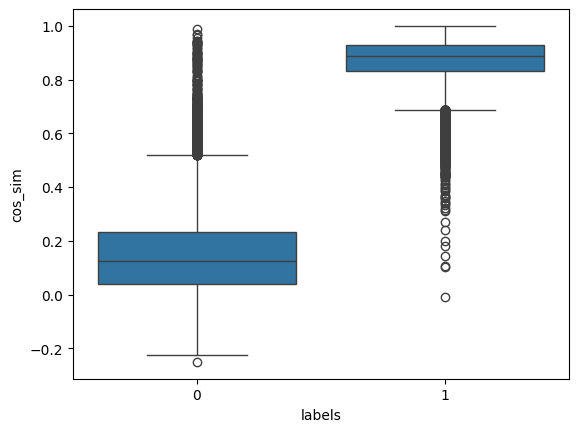

In [163]:
sns.boxplot(sentence_pairs, x="labels", y="cos_sim")
plt.show()

In [164]:
sentence_pairs.shape

(94733, 5)

In [165]:
sentence_pairs.groupby("labels")["cos_sim"].count()

labels
0    59999
1    34734
Name: cos_sim, dtype: int64